In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

In [2]:
from datetime import datetime
from pathlib import Path
import pickle
import sys

import matplotlib.pyplot as plt
from pymatgen.core.structure import Molecule

Custom plotting code... ignore this if you don't know what it is, it should gracefully do nothing if you don't have the `MPLAdjutant` class. 

In [12]:
sys.path.append(str(Path.home() / Path("local")))
class NullClass:
    def do_nothing(*args, **kwargs):
        pass
    def add_colorbar(self, im, **kwargs):
        return plt.colorbar(im)
    def __getattr__(self, _):
        return self.do_nothing
try:
    from mpl_utils import MPLAdjutant
    adj = MPLAdjutant()
    adj.set_defaults()
except ImportError:
    adj = NullClass()

Append the `home` path of this project.

In [4]:
sys.path.append(str(Path.cwd().parent))

# Principal component analysis: verifying the data

In this notebook, we perform basic analysis and Principal Component Analysis to validate that our dataset look sensible.

In [5]:
from sklearn.decomposition import PCA

Load in the previously processed `pickle` data. These contain the features (ACSF) and targets (spectra) on a common grid for each of the three absorbing atom types of interest: C, N and O.

In [6]:
O_data = pickle.load(open("../data/qm9/XANES-220622-ACSF-O.pkl", "rb"))
N_data = pickle.load(open("../data/qm9/XANES-220622-ACSF-N.pkl", "rb"))
C_data = pickle.load(open("../data/qm9/XANES-220622-ACSF-C.pkl", "rb"))

Print some diagonstics...

In [7]:
print(f"O database ACSF & spectrum shapes: {O_data['x'].shape} & {O_data['y'].shape}")
print(f"N database ACSF & spectrum shapes: {N_data['x'].shape} & {N_data['y'].shape}")
print(f"C database ACSF & spectrum shapes: {C_data['x'].shape} & {C_data['y'].shape}")

O database ACSF & spectrum shapes: (186813, 155) & (186813, 200)
N database ACSF & spectrum shapes: (139058, 155) & (139058, 200)
C database ACSF & spectrum shapes: (841912, 155) & (841912, 200)


Put everything in a dictionary for simplicity.

In [8]:
data = {"O": O_data, "N": N_data, "C": C_data}

## Execute and plot

In [9]:
pca_results = dict()
for key, dat in data.items():
    pca_acsf = PCA(2)
    w_acsf = pca_acsf.fit_transform(dat["x"])
    pca_spectra = PCA(2)
    w_spectra = pca_spectra.fit_transform(dat["y"])
    pca_results[key] = {
        "pca_ACSF": pca_acsf,
        "pca_spectra": pca_spectra,
        "w_ACSF": w_acsf,
        "w_spectra": w_spectra
    }

In [43]:
pca_results.keys()

dict_keys(['O', 'N', 'C'])

In [51]:
for key, dat in pca_results.items():
    pca_ACSF = dat["pca_ACSF"]
    pca_spectra = dat["pca_spectra"]
    print(f"Key={key}, ACSF var ratios={pca_ACSF.explained_variance_ratio_}, spectra var ratios={pca_spectra.explained_variance_ratio_}")

Key=O, ACSF var ratios=[0.77001988 0.10912823], spectra var ratios=[0.60050381 0.21521107]
Key=N, ACSF var ratios=[0.74167125 0.08957413], spectra var ratios=[0.41484584 0.25633509]
Key=C, ACSF var ratios=[0.61404826 0.15616871], spectra var ratios=[0.34132816 0.28826326]


We make a production-quality plot of the data here:

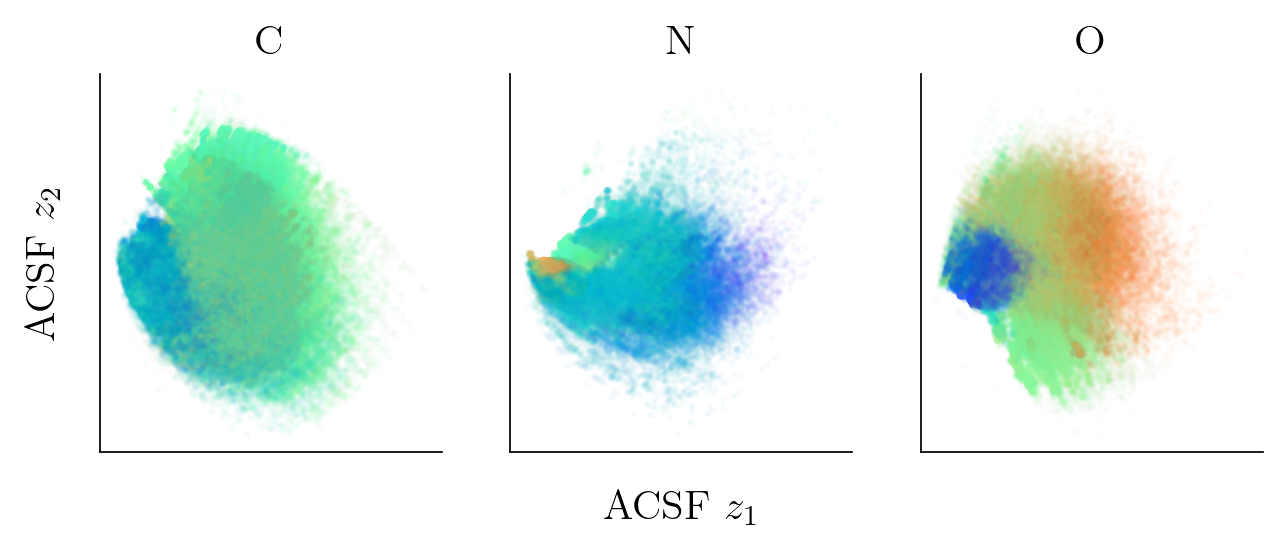

In [61]:
fig, axs = plt.subplots(1, 3, figsize=(6, 2))

N = None
key_ordering = ["C", "N", "O"]

for key, ax in zip(key_ordering, axs):
    w_acsf = pca_results[key]["w_ACSF"]
    w_spectra = pca_results[key]["w_spectra"]
    ax.scatter(w_acsf[:N, 0], w_acsf[:N, 1], alpha=0.02, c=w_spectra[:N, 0], s=1, cmap="rainbow", rasterized=True)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["left"].set_linewidth(0.5)
    ax.spines["bottom"].set_linewidth(0.5)
    ax.tick_params(left=False, bottom=False)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_title(key)

axs[0].set_ylabel(r"ACSF $z_2$")
axs[1].set_xlabel(r"ACSF $z_1$")
    
plt.savefig("qm9_pca.pdf", bbox_inches="tight", dpi=300)

# Do certain structural motifs cluster?

In [62]:
print("test")

test
